<a href="https://colab.research.google.com/github/anafer25/Numerical-Differentiation-with-Fourth-Order-Finite-Difference/blob/main/4thOrderDifferenceMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This code numerically approximates the derivative of a function using a **fourth-order finite difference method ** and measures how the error changes as the step size decreases. It compares the numerical derivative of f(x)=x^6 at x=1 with the exact derivative and plots the error on a log-log scale. The straight line behavior confirms the expected 4th order accuracy.


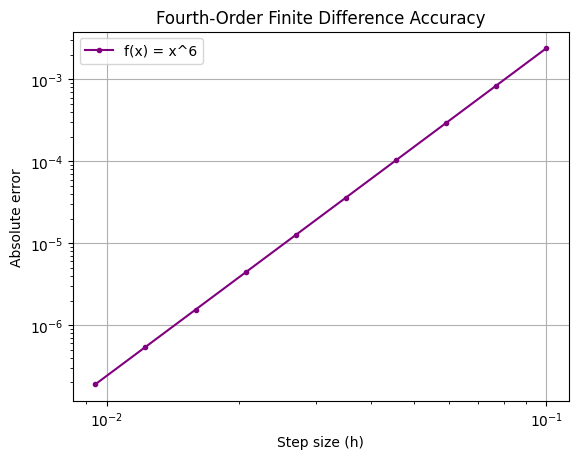

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# function whose derivative we want to approximate
def test_function(x):
    return x**6

# class for 4th-order finite difference derivative
class FiniteDifference:
    def __init__(self, func, step):
        self.func = func
        self.h = step  # public step size

    def derivative(self, x0):
        h = self.h
        return (
            self.func(x0 - 2*h)
            - 8*self.func(x0 - h)
            + 8*self.func(x0 + h)
            - self.func(x0 + 2*h)
        ) / (12*h)

# initial step size
h0 = 0.1

# arrays to store step sizes and errors
steps = np.zeros(10)
errors = np.zeros(10)

# create derivative calculator
diff_calc = FiniteDifference(test_function, h0)

# exact derivative at x = 1
exact_value = 6.0

# compute error for decreasing step sizes
for i in range(10):
    errors[i] = abs(diff_calc.derivative(1.0) - exact_value)
    steps[i] = diff_calc.h  # use the public attribute
    diff_calc.h /= 1.3      # shrink step size

# plot error vs step size on log-log axes
plt.plot(steps, errors, marker='.', color='purple', label='f(x) = x^6')
plt.xlabel('Step size (h)')
plt.ylabel('Absolute error')
plt.title('Fourth-Order Finite Difference Accuracy')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()


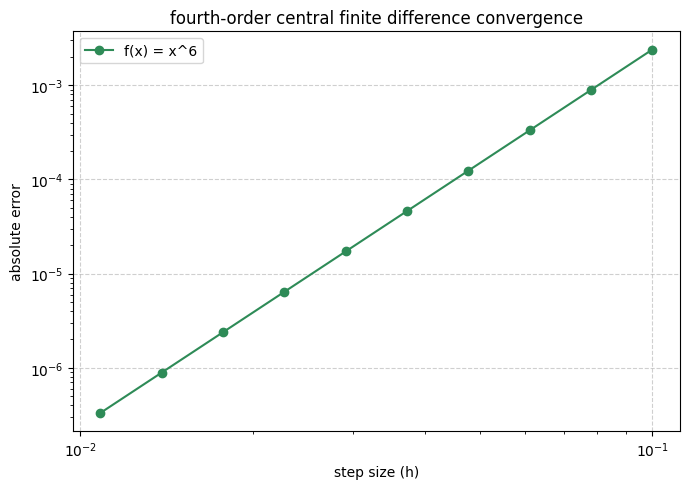

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# example function to differentiate
def sixth_power_func(x):
    return x**6

class CentralDiff4thOrder:
    """
    compute derivatives using a fourth-order central finite difference formula:
    f'(x) ≈ (-f(x+2h) + 8f(x+h) - 8f(x-h) + f(x-2h)) / (12h)
    """
    def __init__(self, func, step_size):
        self.func = func
        self._h = step_size  # step size (internal)

    def get_step(self):
        """return current step size"""
        return self._h

    def set_step(self, new_h):
        """update step size"""
        self._h = new_h

    def derivative_at(self, x_point):
        """compute derivative at x_point using 4th-order central difference"""
        h = self._h
        return (
            -self.func(x_point + 2*h)
            + 8*self.func(x_point + h)
            - 8*self.func(x_point - h)
            + self.func(x_point - 2*h)
        ) / (12*h)

# initialize parameters
initial_h = 0.1
num_steps = 10
x_points = np.zeros(num_steps)
errors = np.zeros(num_steps)
evaluation_point = 1.0
exact_derivative = 6.0  # derivative of x^6 at x=1

# create derivative calculator
central_diff = CentralDiff4thOrder(sixth_power_func, initial_h)

# compute derivative errors for decreasing step sizes
for i in range(num_steps):
    approx = central_diff.derivative_at(evaluation_point)
    errors[i] = abs(approx - exact_derivative)
    x_points[i] = central_diff.get_step()
    # reduce step size by a slightly different factor
    central_diff.set_step(central_diff.get_step() / 1.28)

# plot error vs step size on log-log scale
plt.figure(figsize=(7,5))
plt.plot(x_points, errors, 'o-', color='seagreen', label='f(x) = x^6')
plt.xlabel('step size (h)')
plt.ylabel('absolute error')
plt.title('fourth-order central finite difference convergence')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
